In [1]:
import pandas as pd 
import numpy as np

# Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import classification_report, auc
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [2]:
#Load the data that was saved from the fraud detection functions 
frauddata = ('output_data/modeling_data.csv')
fraud_data = pd.read_csv(frauddata)
df = fraud_data.drop(['Unnamed: 0', 'ipv4'], axis=1) # getting rid of IP Address
df

,credit_card_number,state,valid_vendor,start_val,valid_card
0,341699761913307,IN,True,34,True
1,180011131174905,PA,True,1800,True
2,4808375377167,GA,True,4,True
3,4864308841346749,LA,True,4,True
4,3541314305340585,TX,True,35,True
...,...,...,...,...,...
453620,30443556780787,IL,True,304,False
453621,375712024591957,MS,True,37,False
453622,3521881287540980,LA,True,35,False
453623,3574961180083290,ND,True,35,False


In [3]:
df.dtypes # checking data types


credit_card_number     int64
state                 object
valid_vendor            bool
start_val              int64
valid_card              bool
dtype: object

In [4]:
# Function to count the number of digits in each credit card number
def get_len_number(df):
    num_lens = []
    for i in range(len(df)):
        num_len = len(str(df['credit_card_number'][i]))
        num_lens.append(num_len)
    return(num_lens)
num_lens = get_len_number(df)

In [5]:
# Function to add the card number lengths to dataframe
def add_length_column(df, values):
    df = df.assign(number_length = values)
    return(df)
df = add_length_column(df, num_lens)

In [6]:
# checking new df
df

,credit_card_number,state,valid_vendor,start_val,valid_card,number_length
0,341699761913307,IN,True,34,True,15
1,180011131174905,PA,True,1800,True,15
2,4808375377167,GA,True,4,True,13
3,4864308841346749,LA,True,4,True,16
4,3541314305340585,TX,True,35,True,16
...,...,...,...,...,...,...
453620,30443556780787,IL,True,304,False,14
453621,375712024591957,MS,True,37,False,15
453622,3521881287540980,LA,True,35,False,16
453623,3574961180083290,ND,True,35,False,16


In [7]:
len(df[df['valid_card'] == True])

452698

In [8]:
len(df[df['valid_card'] == False])

927

In [9]:
# One hot encoding for 'state' variable for modeling purposes 

one_hot = pd.get_dummies(df['state'])
data = df.drop('state', axis=1) # Drop the column
data = data.join(one_hot)
data

,credit_card_number,valid_vendor,start_val,valid_card,number_length,AK,AL,AR,AZ,CA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,341699761913307,True,34,True,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,180011131174905,True,1800,True,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4808375377167,True,4,True,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4864308841346749,True,4,True,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3541314305340585,True,35,True,16,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453620,30443556780787,True,304,False,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453621,375712024591957,True,37,False,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453622,3521881287540980,True,35,False,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453623,3574961180083290,True,35,False,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [10]:
# DATA SPLIT 65/35

X = data.drop('valid_card', axis = 1).values
y = data['valid_card'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294856, 55)
(158769, 55)
(294856,)
(158769,)


## Random Forest

In [11]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# predictions
y_pred = rfc.predict(X_test)

# Diagnostics
acc= accuracy_score(y_test,y_pred)
print("accuracy", acc)

prec= precision_score(y_test,y_pred)
print("precision", prec)

rec= recall_score(y_test,y_pred)
print("recall", rec)

f1= f1_score(y_test,y_pred)
print("f1", f1)

conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix", conf_mat)

auc = roc_auc_score(y_test,y_pred)
print("auc", auc)

print(classification_report(y_test, y_pred))


accuracy 0.9959311956364277
precision 0.9978166076645906
recall 0.9981063355699614
f1 0.9979614505888441
confusion matrix [[     0    346]
 [   300 158123]]
auc 0.4990531677849807
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       346
        True       1.00      1.00      1.00    158423

    accuracy                           1.00    158769
   macro avg       0.50      0.50      0.50    158769
weighted avg       1.00      1.00      1.00    158769



We look at the F1 score rather than ROC AUC becuase we are looking at a classification model for class labels rather than for probabilities. 


Precision is the number of correctly-identified members of a class divided by all the times the model predicted that class.

Recall is the number of members of a class that the classifier identified correctly divided by the total number of members in that class.


F1 score is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low. F1 is a quick way to tell whether the classifier is actually good at identifying members of a class, or if it is finding shortcuts (e.g., just identifying everything as a member of a large class).

## ROC Curve

In [12]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.4990531677849807

Text(0.5, 0, 'False Positive Rate')

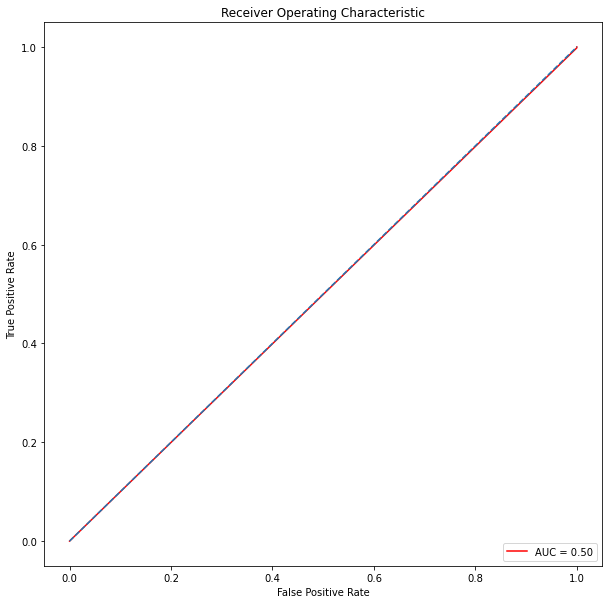

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

__The biggest limiations to our random forest classifier is two-fold:__

1. Unbalanced Data - Our dataset only contains about 0.2% of fradulent card numbers.  

2. Few predictors - After pre-processing the data, we still only have 4 predictors and one-hot-encoded the state. These predictors may not hold enough information throughout our data for predicting the fradulent credit card numbers. 

## Bagging Classifier

In [14]:
model = BaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))



Mean ROC AUC: 0.498


In [15]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)



In [16]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_dt = auc(false_positive_rate, true_positive_rate)
roc_auc_dt



0.48519104246372813